# Execução de SHAP para descobrir as variáveis mais importantes

In [1]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Carregar dataset
df = pd.read_csv("datasetRAW.csv", sep = ",")



c:\Users\Eduardo\Desktop\AbandonLess\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = df[df['Target'] != 'Enrolled']

X_scaled shape: (3630, 34), SHAP shape: (14520, 34)
X_train_combined shape: (14520, 34)


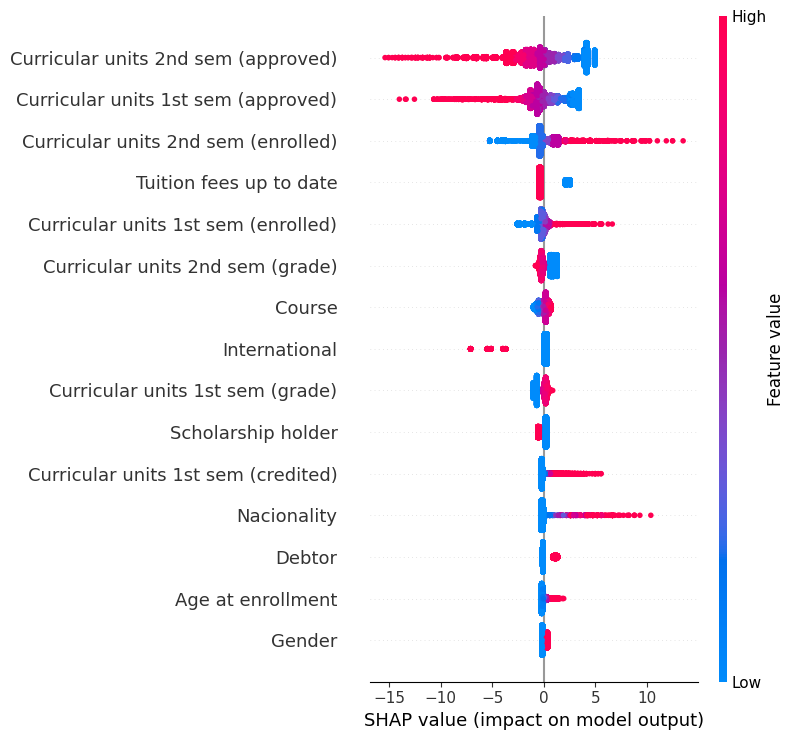

In [4]:
# Separar features (X) e target (y)
X = df.drop(columns=['Target'])  # Substitui 'Target' pelo nome correto
y = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)  # Converter para binário

# Normalizar as features e manter os nomes das colunas
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Inicializar o modelo
model = LogisticRegression()

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lista para armazenar valores SHAP
shap_values_list = []
X_train_full = []

# Cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index] #iloc permite usar linhas/colunas especificas do data set conforme o index
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar modelo
    model.fit(X_train, y_train)

    # Aplicar SHAP
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_train)

    # Guardar os valores SHAP e X_train correspondentes
    shap_values_list.append(shap_values.values)
    X_train_full.append(X_train)

# Unir os valores SHAP
all_shap_values = np.vstack(shap_values_list)
X_train_combined = pd.concat(X_train_full, axis=0)

# Verificar tamanhos
print(f"X_scaled shape: {X_scaled.shape}, SHAP shape: {all_shap_values.shape}")
print(f"X_train_combined shape: {X_train_combined.shape}")

# Garantir que o SHAP e X_train_combined estão alinhados
shap.summary_plot(all_shap_values, X_train_combined, max_display=15)